In [ ]:
#@title 1. MONTAR EL DRIVE { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/IA')
print(os.getcwd())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/IA


**GUARDAR PROYECTO**

In [ ]:
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

# <center> ***Análisis y clasificación sobre el COVID-19 en Colombia***</center>


**Presentado por: Edinson Jahir Rodriguez, Sergio Raúl Roa Ortiz y Mauren Lorena Cobos Becerra.**

<img src="https://s1.eestatic.com/2020/03/05/como/Coronavirus-Enfermedades_infecciosas-Infecciones-Como_hacer_472464572_147429912_1706x960.jpg" alt="Coronavirus" width="1000" height="500">

**Introducción:** Nuestro análisis y clasificación sobre el COVID-19 partirá del dataset llamado "Estado de Casos de Coronavirus COVID-19 en Colombia", Tomando como tope el dia 31 de julio de 2020 en el cual habían 317.652 contagiados por Coronavirus en el pais. Teniendo en cuenta los datos que nos proporciona este dataset, partimos de analizar mediante diferentes modelos de clasificación, cómo fue avanzando el coronavirus dentro del pais, en qué casos las personas tuvieron mayor complejidad a la hora de enfrentar este virus teniendo en cuenta cada una de las columnas que componen el dataset. Empezamos analizando los casos que provienen de otros paises, ya que como sabemos, esos fueron los primeros casos positivos que llegaron al pais y posteriormente contagiaron a las diferentes personas hasta llegar a la cifra actual y a la cifra hasta el dia lunes 31 de julio de 2020, la cual utilizaremos en este proyecto.



**Objetivos**



*   Analizar la población más afectada en Colombia.
*   Clasificar datos de los factores de interés teniendo en cuenta las columnas seleccionadas.



**Utilizaremos:**
*   Dataset: Estado de Casos de Coronavirus COVID-19 en Colombia.
*   Modelo: Decision Tree classifier, RFC(Random Forest classifier), SVM: Support vector Machine.   



In [ ]:
#Librerias
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing

In [ ]:
d = pd.read_csv('covid_19.csv')
print(d.shape) 
d.head()

(317651, 21)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ID de caso    Fecha de notificación  ...  Pertenencia etnica Nombre grupo etnico
0           1  2020-03-02T00:00:00.000  ...                Otro                 NaN
1           2  2020-03-06T00:00:00.000  ...                Otro                 NaN
2           3  2020-03-07T00:00:00.000  ...                Otro                 NaN
3           4  2020-03-09T00:00:00.000  ...                Otro                 NaN
4           5  2020-03-09T00:00:00.000  ...                Otro                 NaN

[5 rows x 21 columns]

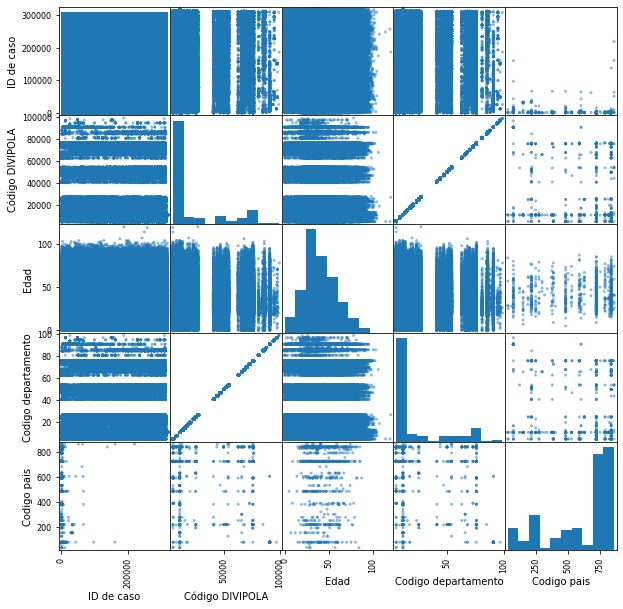

In [ ]:
pd.plotting.scatter_matrix(d, figsize=(10,10));

In [ ]:
d.drop(['ID de caso','Ciudad de ubicación','Fecha de notificación','Código DIVIPOLA','País de procedencia', 'FIS', 'Fecha de muerte', 'Fecha diagnostico', 'Fecha recuperado', 'fecha reporte web', 'Codigo departamento', 'Codigo pais', 'Pertenencia etnica', 'Nombre grupo etnico', 'Tipo recuperación'],axis = 1, inplace = True)

In [ ]:
d.head()

Departamento o Distrito     atención  Edad Sexo         Tipo Estado
0              Bogotá D.C.  Recuperado    19    F    Importado   Leve
1          Valle del Cauca  Recuperado    34    M    Importado   Leve
2                Antioquia  Recuperado    50    F    Importado   Leve
3                Antioquia  Recuperado    55    M  Relacionado   Leve
4                Antioquia  Recuperado    25    M  Relacionado   Leve

In [ ]:
print(d.columns)

Index(['Departamento o Distrito ', 'atención', 'Edad', 'Sexo', 'Tipo',
       'Estado'],
      dtype='object')


In [ ]:
#Reemplazamos los datos de la columna 'Sexo' por datos numéricos
d["Sexo"].replace(["M","F"],[1,2],inplace=True)
d["Sexo"] = d["Sexo"].replace(np.nan,0)
mujeres = d['Sexo'].eq(2).sum()
hombres = d['Sexo'].eq(1).sum()
print('Mujeres : ', mujeres)
print('Hombres : ', hombres)

Mujeres :  149311
Hombres :  168331


In [ ]:
#Reemplazamos los datos de la columna 'atención' por datos numéricos
d["atención"].replace(["Recuperado","Fallecido","Hospital","Casa","Hospital UCI", "N/A" ],[1,2,3,4,5,6],inplace=True)
d["atención"] = d["atención"].replace(np.nan,0)
Recuperados = d['atención'].eq(1).sum()
Fallecidos = d['atención'].eq(2).sum()
Hospital = d['atención'].eq(3).sum()
Casa = d['atención'].eq(4).sum()
Hospital_UCI= d['atención'].eq(5).sum()
Ninguno = d['atención'].eq(6).sum()
print('Recuperados : ', Recuperados)
print('Fallecidos : ', Fallecidos)
print('Hospital : ', Hospital)
print('Casa : ', Casa)
print('Hospital UCI : ', Hospital_UCI)
print('N/A : ', Ninguno)

Recuperados :  167239
Fallecidos :  10650
Hospital :  14589
Casa :  122946
Hospital UCI :  1562
N/A :  0


In [ ]:
#Edad promedio de poblacion infectada 
promedio_edad = int(d["Edad"].mean())
print(promedio_edad)

39


In [ ]:
#Reemplazamos los datos de la columna 'Departamento o Distrito ' por datos numéricos
d['Departamento o Distrito '].replace(['Amazonas', 'Antioquia', 'Arauca', 'Archipiélago de San Andrés Providencia y Santa Catalina', 'Atlántico', 'Barranquilla D.E.',
       'Bogotá D.C.', 'Bolívar', 'Boyacá', 'Buenaventura D.E.', 'Caldas', 'Caquetá',
       'Cartagena D.T. y C.', 'Casanare', 'Cauca', 'Cesar', 'Chocó', 'Córdoba','Cundinamarca', 'Guainía', 'Guaviare',
       'Huila', 'La Guajira', 'Magdalena', 'Meta', 'Nariño', 'Norte de Santander', 'Putumayo',
       'Quindío', 'Risaralda', 'Santa Marta D.T. y C.', 'Santander', 'Sucre',
       'Tolima', 'Valle del Cauca', 'Vaupés', 'Vichada'],range(37),inplace=True)

In [ ]:
#Reemplazamos los datos de la columna 'Estado' por datos numéricos
d["Estado"].replace(["Asintomático","Fallecido","Grave","Leve","Moderado", "N/A" ],[1,2,3,4,5,6],inplace=True)
d["Estado"] = d["Estado"].replace(np.nan,0)
Asintomaticos = d['Estado'].eq(1).sum()
Fallecidos = d['Estado'].eq(2).sum()
Grave = d['Estado'].eq(3).sum()
Leve = d['Estado'].eq(4).sum()
Moderado= d['Estado'].eq(5).sum()
Ninguno = d['Estado'].eq(6).sum()
print('Asintomaticos : ', Asintomaticos)
print('Fallecidos : ', Fallecidos)
print('Grave : ', Grave)
print('Leve : ', Leve)
print('Moderado : ', Moderado)
print('Ninguno : ', Ninguno)

Asintomaticos :  37907
Fallecidos :  10631
Grave :  1546
Leve :  250297
Moderado :  16587
Ninguno :  0


In [ ]:
#Reemplazamos los datos de la columna 'atención' por datos numéricos
d["Tipo"].replace(["En estudio","Importado","Relacionado"],[1,2,3],inplace=True)
d["Tipo"] = d["Tipo"].replace(np.nan,0)
Estudio = d['Tipo'].eq(1).sum()
Importados = d['Tipo'].eq(2).sum()
Relacionados = d['Tipo'].eq(3).sum()
print('Estudio : ', Estudio)
print('Importados : ', Importados)
print('Relacionados : ', Relacionados)

Estudio :  295888
Importados :  975
Relacionados :  20763


In [ ]:
#Visualizar las columas que tienen datos vacios
print(pd.isnull(d).sum())

Departamento o Distrito     0
atención                    0
Edad                        0
Sexo                        0
Tipo                        0
Estado                      0
dtype: int64


In [ ]:
d.head()

Departamento o Distrito   atención  Edad Sexo Tipo  Estado
0                         6       1.0    19    2    2     4.0
1                        34       1.0    34    1    2     4.0
2                         1       1.0    50    2    2     4.0
3                         1       1.0    55    1    3     4.0
4                         1       1.0    25    1    3     4.0

In [ ]:
d.drop(['Tipo', 'Sexo'],axis = 1, inplace = True)

In [ ]:
#Se establecen las variables 
X=d.values[:,:-1]
Y=np.array(d.values[:,-1],dtype=int)
#Se parten los datos para entrenar y predecir
n = int(len(X)*0.8)
tam=range(len(Y))
perm = np.random.permutation(len(tam))
X_train = X[perm[:n]]
Y_train = Y[perm[:n]]
X_test = X[perm[n:]]
Y_test = Y[perm[n:]]

In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

In [ ]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

GN_est = GaussianNB()
DT_est = DecisionTreeClassifier()
RF_est = RandomForestClassifier(n_estimators=2)

print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

print ("GaussianNB()")
GN_est.fit(X_train, Y_train)
print ("acierto en train", GN_est.score(X_train, Y_train))
print ("acierto en test ", GN_est.score(X_test, Y_test))
print ("")

print ("DecisionTreeClassifier()")
DT_est.fit(X_train, Y_train)
print ("acierto en train", DT_est.score(X_train, Y_train))
print ("acierto en test ", DT_est.score(X_test, Y_test))
print ("")

print ("RandomForestClassifier(n_estimators=2)")
RF_est.fit(X_train, Y_train)
print ("acierto en train", RF_est.score(X_train, Y_train))
print ("acierto en test ", RF_est.score(X_test, Y_test))
print ("")


dimensiones train (222355, 3) (222355,)
dimsensions test  (95296, 3) (95296,)

GaussianNB()
acierto en train 0.8273121809718693
acierto en test  0.8253232034922767

DecisionTreeClassifier()
acierto en train 0.8749207348609206
acierto en test  0.8716000671591673

RandomForestClassifier(n_estimators=2)
acierto en train 0.874165186301185
acierto en test  0.8706136668905305



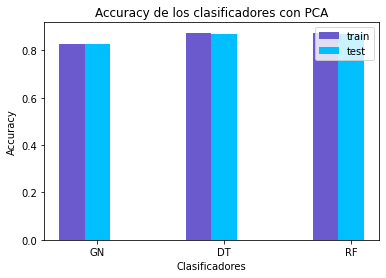

In [ ]:
train=[GN_est.score(X_train, Y_train), DT_est.score(X_train, Y_train), 
      RF_est.score(X_train, Y_train)]

test=[GN_est.score(X_test, Y_test), DT_est.score(X_test, Y_test), 
      RF_est.score(X_test, Y_test)]
clas=["GN", "DT", "RF"]

barWidth=0.2

plt.bar(np.arange(len(train)), train, color="#6A5ACD", width=barWidth, label="train");
plt.bar([x + barWidth for x in np.arange(len(train))], test, color="#00BFFF", width=barWidth, label="test");
plt.xlabel("Clasificadores");
plt.ylabel("Accuracy");
plt.xticks([r + barWidth for r in range(len(train))], clas);
plt.title("Accuracy de los clasificadores");
plt.legend();
plt.show();

In [ ]:
def show_curve(est,X,y):
    means, stds = [], []
    nfolds_range = range(2,11)
    for nfolds in nfolds_range:
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("Comportamiento")
    plt.legend()
    plt.grid(False)

In [ ]:
from sklearn.metrics import make_scorer,accuracy_score

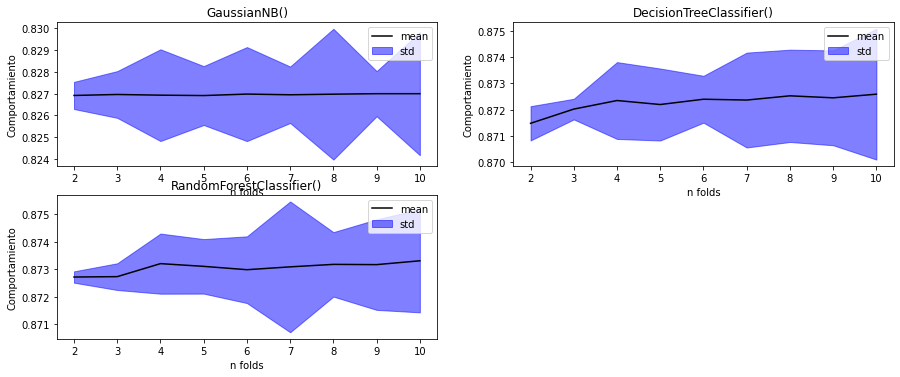

In [ ]:
estimadores=[GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier()]
C=["GaussianNB()","DecisionTreeClassifier()","RandomForestClassifier()"]
plt.figure(figsize=(15,9))
for i,este in enumerate(estimadores):
    plt.subplot(3,2,i+1)
    plt.title(C[i])
    show_curve(este,X_train,Y_train)